In [1]:
import numpy as np 
import pandas as pd
from pandas.plotting import lag_plot
from pandas import datetime
from subprocess import check_output
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import os
import re
%matplotlib inline
pd.set_option('display.max_colwidth', None)

C:\Users\VINEET~1\AppData\Local\Temp/ipykernel_448/1912148596.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
import yfinance as yf

direct = yf.download("RELIANCE.BO", start = '2021-01-01', end='2022-01-01')

direct.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,1986.150024,1997.300049,1982.300049,1987.150024,1980.777222,157713
2021-01-04,1988.550049,1997.900024,1967.900024,1990.650024,1984.265991,345853
2021-01-05,1972.050049,1984.000000,1956.000000,1966.000000,1959.694946,338549
2021-01-06,1968.000000,1968.000000,1905.000000,1914.150024,1908.011353,864039
2021-01-07,1921.900024,1945.199951,1905.650024,1911.000000,1904.871338,564975


In [3]:
df = pd.read_excel("Rel2.xlsx")
df.shape

(245, 13)

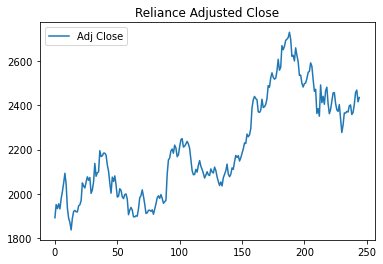

In [4]:
#Lets first plot the Adj closing prices for Reliance
df[['Adj Close']].plot()
plt.title("Reliance Adjusted Close")
plt.show()

In [5]:
df.isnull().sum()

Unnamed: 0    0
Date          0
Summary       0
Negative      0
Positive      0
Neutral       0
Comp          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
dtype: int64

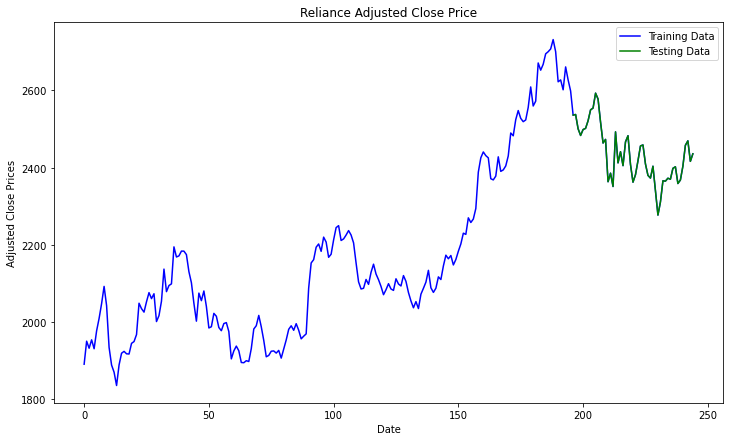

In [6]:
#Splitting into data into test & Training Set
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Reliance Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Prices')
plt.plot(df['Adj Close'], 'blue', label='Training Data')
plt.plot(test_data['Adj Close'], 'green', label='Testing Data')
plt.legend()

In [7]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
adfuller(train_data['Adj Close'])

(-0.43761110379815177,
 0.9036271489708061,
 0,
 195,
 {'1%': -3.464337030867007,
  '5%': -2.876478799035722,
  '10%': -2.574733103221565},
 1764.482514790639)

In [8]:
trainS=log(train_data['Adj Close']).diff()
adfuller(trainS[1:])

(-12.071930143242067,
 2.336984410635176e-22,
 0,
 194,
 {'1%': -3.4645146202692527,
  '5%': -2.8765564361715534,
  '10%': -2.5747745328940375},
 -997.1899718206428)

In [9]:
testS=log(test_data['Adj Close']).diff()
adfuller(testS[1:])

(-5.97110259787341,
 1.9353657754119042e-07,
 2,
 45,
 {'1%': -3.584828853223594,
  '5%': -2.9282991495198907,
  '10%': -2.6023438271604937},
 -184.78445495214436)

<AxesSubplot:>

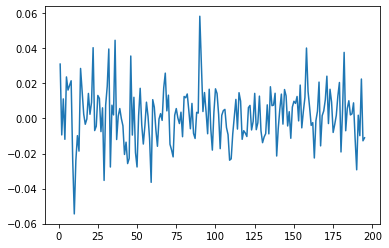

In [10]:
trainS.plot()

In [11]:
from pmdarima import auto_arima

In [12]:
arima_model = auto_arima(trainS[1:],start_p=1,start_q=1,max_p=1,max_q=1,trace=True,error_action='warn',suppress_warnings=True,stepwise=True,random_state=20,n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1063.068, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1062.862, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1065.012, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1065.026, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1062.771, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1065.365, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1063.443, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1065.437, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.189 seconds


In [13]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  195
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 534.719
Date:                Fri, 14 Jan 2022   AIC                          -1065.437
Time:                        10:38:56   BIC                          -1058.891
Sample:                             0   HQIC                         -1062.787
                                - 195                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1528      0.065      2.351      0.019       0.025       0.280
sigma2         0.0002      2e-05     12.157      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                10.12
Prob(Q):                              0.96   Prob(JB):                         0.01
Heteroskedasticity (H):               0.50   Skew:                             0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
#Making final predictions using ARIMA function
train_ar = trainS[1:].values
test_ar = testS[1:].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(2,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    print(output)
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
print('Testing Mean Squared Error: %.5f' % mean_squared_error(test_ar, predictions))
print('Testing Mean Absolute Error: %.5f' % mean_absolute_error(test_ar, predictions))

<class 'list'>
(array([0.00019474]), array([0.01551888]), array([[-0.03022172,  0.03061119]]))
(array([0.001902]), array([0.01547927]), array([[-0.02843682,  0.03224082]]))
(array([-0.00086815]), array([0.01548475]), array([[-0.0312177 ,  0.02948139]]))


C:\Users\Vineet Jain\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


(array([0.00068838]), array([0.01545146]), array([[-0.02959592,  0.03097268]]))
(array([0.00249736]), array([0.01541735]), array([[-0.02772008,  0.03271481]]))
(array([0.00136055]), array([0.01537901]), array([[-0.02878176,  0.03150286]]))
(array([0.00254304]), array([0.01534753]), array([[-0.02753756,  0.03262365]]))
(array([0.00289837]), array([0.0153213]), array([[-0.02713083,  0.03292756]]))
(array([0.00137379]), array([0.0152837]), array([[-0.02858171,  0.0313293 ]]))
(array([0.00372009]), array([0.01527573]), array([[-0.02621979,  0.03365997]]))
(array([0.0001626]), array([0.01525319]), array([[-0.0297331,  0.0300583]]))
(array([-0.00210405]), array([0.01530425]), array([[-0.03209984,  0.02789174]]))
(array([-0.00158109]), array([0.01532632]), array([[-0.03162014,  0.02845795]]))
(array([0.00260707]), array([0.01529384]), array([[-0.0273683 ,  0.03258245]]))
(array([-0.0061024]), array([0.01560738]), array([[-0.03669231,  0.02448751]]))
(array([0.00276543]), array([0.01560485]), 

In [15]:
model_fit.predict(2500)

array([-0.00070402,  0.0010885 ,  0.00112286, ...,  0.00111575,
        0.00111575,  0.00111575])

C:\Users\VINEET~1\AppData\Local\Temp/ipykernel_448/2092055458.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(trainS[1:], 'green', color='blue', label='Training Data')


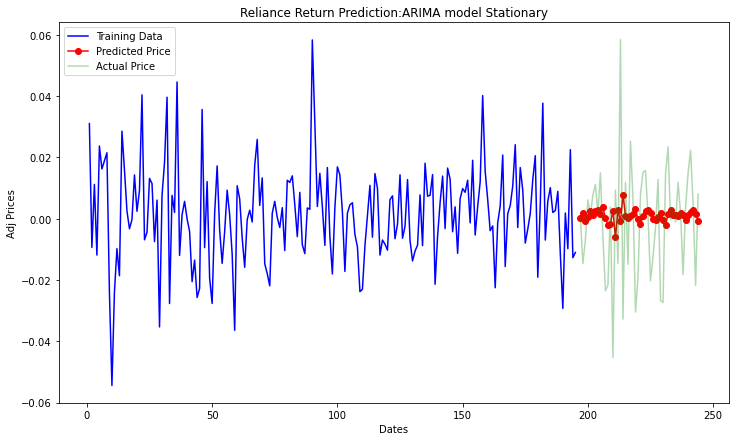

In [16]:
#Plotting the output
plt.figure(figsize=(12,7))
plt.plot(trainS[1:], 'green', color='blue', label='Training Data')
plt.plot(test_data.index[1:],predictions, color='red', marker='o',
         label='Predicted Price')
plt.plot(test_data.index[1:], testS[1:].values, color='green', label='Actual Price',alpha=0.3)
plt.title('Reliance Return Prediction:ARIMA model Stationary')
plt.xlabel('Dates')
plt.ylabel('Adj Prices')
plt.legend()

In [17]:
testS[196]=np.log(test_data['Adj Close'][196])
ArimaModel=pd.DataFrame(np.exp(testS.cumsum()))
ArimaModel.rename(columns={'Adj Close': 'Y_Test'},inplace=True)

In [18]:
PredictedValue=[x.tolist() for x in predictions]
PredictedValue=[val for sublist in PredictedValue for val in sublist]
PredictedValue.insert(0,np.log(test_data['Adj Close'][196]))
ArimaModel['ARIMA_Prediction']=PredictedValue
ArimaModel['ARIMA_Prediction']=pd.DataFrame(np.exp(ArimaModel['ARIMA_Prediction'].cumsum()))
ArimaModel.drop(ArimaModel.head(1).index, inplace=True)

C:\Users\VINEET~1\AppData\Local\Temp/ipykernel_448/1809992261.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(train_data['Adj Close'], 'green', color='blue', label='Training Data')


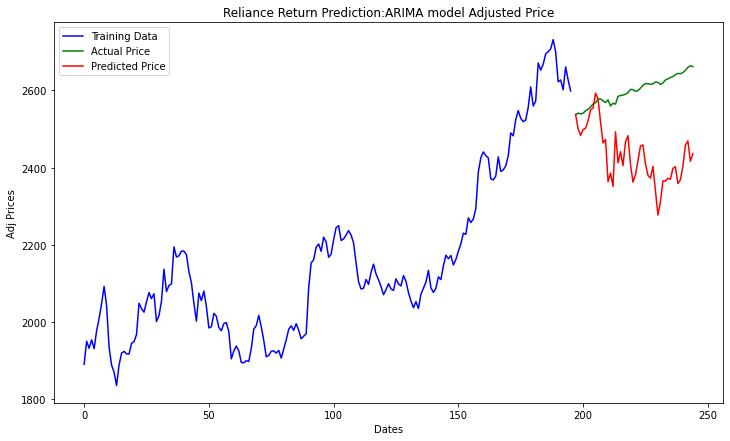

In [19]:
#plotting the final predicted Stock Price to the actual test data
plt.figure(figsize=(12,7))
plt.plot(train_data['Adj Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index[1:],ArimaModel['ARIMA_Prediction'], color='green', label='Actual Price')
plt.plot(test_data.index[1:], ArimaModel['Y_Test'].values, color='red', label='Predicted Price')
plt.title('Reliance Return Prediction:ARIMA model Adjusted Price')
plt.xlabel('Dates')
plt.ylabel('Adj Prices')
plt.legend()

In [20]:
ArimaModel.head(5)

,Y_Test,ARIMA_Prediction
197,2537.800049,2536.743948
198,2500.800049,2541.573435
199,2483.600098,2539.367916
200,2498.850098,2541.116559
201,2501.949951,2547.470582


In [21]:
#ARIMA model mean squared error
print('RMSE: %.2f' % np.sqrt(mean_squared_error(ArimaModel['Y_Test'], ArimaModel['ARIMA_Prediction'])))

RMSE: 192.18


In [22]:
#ARIMA model mean absolute error
print('MAE: %.2f' % mean_absolute_error(ArimaModel['Y_Test'], ArimaModel['ARIMA_Prediction']))

MAE: 168.15


In [23]:
#Exporting the Arima Predictions to csv file which will be used in hybrid model.
ArimaModel['ARIMA_Prediction'].to_csv('ArimaPrediction.csv')

In [24]:
X = pd.read_excel(r"Rel2.xlsx")
X = X[['Date','Negative','Positive','Neutral','Comp','Adj Close','Volume']]

In [25]:
X.isnull().sum()

Date         0
Negative     0
Positive     0
Neutral      0
Comp         0
Adj Close    0
Volume       0
dtype: int64

In [26]:
X.shape

(245, 7)

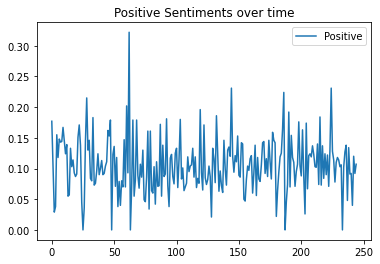

In [27]:
X[['Positive']].plot()
plt.title("Positive Sentiments over time")
plt.show()

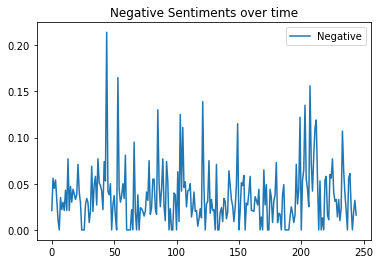

In [28]:
X[['Negative']].plot()
plt.title("Negative Sentiments over time")
plt.show()

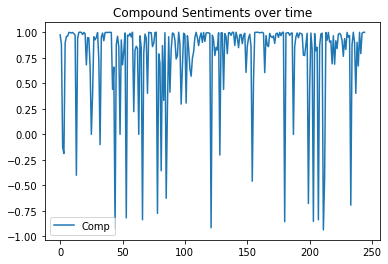

In [29]:
X[['Comp']].plot()
plt.title("Compound Sentiments over time")
plt.show()

<AxesSubplot:xlabel='Adj Close', ylabel='Volume'>

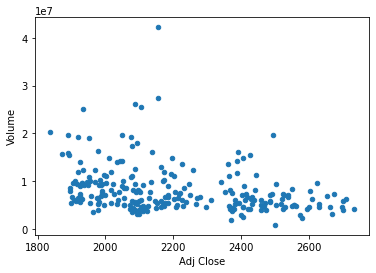

In [30]:
X.plot.scatter('Adj Close','Volume')

In [31]:
#Split into Train and test data
x_train, x_test = X[0:int(len(df)*0.8)][['Neutral','Comp']], X[int(len(df)*0.8)+1:][['Neutral','Comp']]
y_train, y_test = X[0:int(len(df)*0.8)][['Adj Close']], X[int(len(df)*0.8)+1:][['Adj Close']]

In [32]:
x_train.shape,x_test.shape,y_train.shape, y_test.shape

((196, 2), (48, 2), (196, 1), (48, 1))

In [33]:
#Scaling the train data for LinearRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Cols=x_train.columns
x_train_scaled=scaler.fit_transform(x_train)
x_train_scaled=pd.DataFrame(x_train_scaled,columns=Cols)
x_train_scaled.head(5)

,Neutral,Comp
0,0.390769,0.986475
1,0.516923,0.938667
2,0.775385,0.413255
3,0.716923,0.382406
4,0.424615,0.945794


In [34]:
x_test_scaled=scaler.fit_transform(x_test)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=Cols)
x_test_scaled.head(5)

,Neutral,Comp
0,0.615385,0.940116
1,0.271255,0.994885
2,0.242915,0.133926
3,0.805668,0.710292
4,0.283401,0.996073


In [35]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error

In [36]:
#Building baseline LinearRegression model
ModelLR=LR()
ModelLR.fit(x_train_scaled, y_train)
preds_val = ModelLR.predict(x_test_scaled)
np.sqrt(mean_squared_error(y_test, preds_val))

306.4595226090229

C:\Users\VINEET~1\AppData\Local\Temp/ipykernel_448/3527510500.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(X['Adj Close'], 'green', color='blue', label='Training Data')


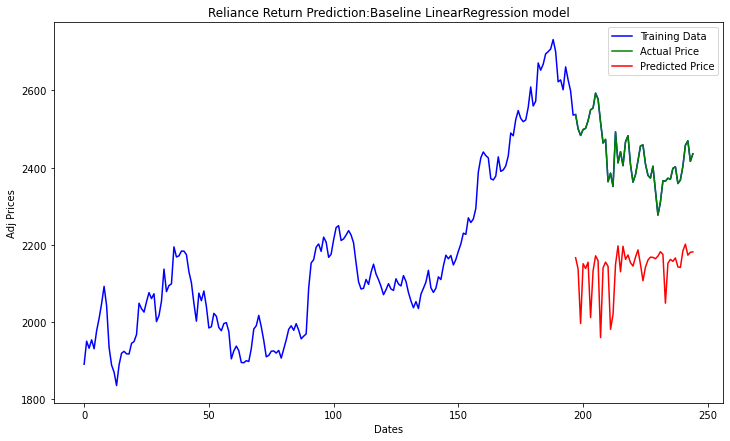

In [37]:
#Plotting the predicted values from baseline LinearRegression model
plt.figure(figsize=(12,7))
plt.plot(X['Adj Close'], 'green', color='blue', label='Training Data')
plt.plot(x_test.index[:],y_test, color='green', label='Actual Price')
plt.plot(x_test.index[:], preds_val, color='red', label='Predicted Price')
plt.title('Reliance Return Prediction:Baseline LinearRegression model')
plt.xlabel('Dates')
plt.ylabel('Adj Prices')
plt.legend()

In [38]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [39]:
#Building a baseline DecisionTreeRegressor model
ModelDTR=DTR()
ModelDTR.fit(x_train, y_train)
preds_val = ModelDTR.predict(x_test)
np.sqrt(mean_squared_error(y_test, preds_val))

356.68849122595043

In [40]:
#Searching for best DecisionTreeRegressor model parameters using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [2, 10, 20, 30, 40],
              "max_depth": [4, 6, 8, 10, 12],
              "min_samples_leaf": [8, 16, 32, 64, 128],
              "max_leaf_nodes": [8, 16, 32, 64, 128],
              }
preds_val = RandomizedSearchCV(DTR(),
                         param_grid,
                         scoring='neg_mean_squared_error',
                         n_iter=90)

search = preds_val.fit(x_train, y_train)

search.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 128,
 'max_leaf_nodes': 32,
 'max_depth': 10,
 'criterion': 'mae'}

In [41]:
#Constructing the optimal DecisionTreeRegressor model
optimal_params = {'min_samples_split': 30,
 'min_samples_leaf': 8,
 'max_leaf_nodes': 16,
 'max_depth': 12,
 'criterion': 'mse'}
ModelDTRBest=DTR(**optimal_params)
ModelDTRBest.fit(x_train, y_train)
preds_val = ModelDTRBest.predict(x_test)
np.sqrt(mean_squared_error(y_test, preds_val))

318.5436452351215

In [42]:
print(preds_val)

[2122.3264646  2296.05182152 1990.14219662 2165.92440357 2296.05182152
 2122.3264646  1990.14219662 2077.80914707 2121.003894   2122.3264646
 1990.14219662 2049.7834168  2077.80914707 2296.05182152 1990.14219662
 1990.14219662 2177.579463   1998.81750475 2177.579463   1998.81750475
 2122.3264646  2165.92440357 2195.29204209 2122.3264646  2122.3264646
 2165.92440357 2077.80914707 2296.05182152 2077.80914707 2122.3264646
 2121.003894   2122.3264646  2122.3264646  2177.579463   2195.29204209
 2195.29204209 2121.003894   2122.3264646  2177.579463   2122.3264646
 2225.79119189 2049.7834168  2122.3264646  2177.579463   2225.79119189
 2296.05182152 2177.579463   2177.579463  ]


C:\Users\VINEET~1\AppData\Local\Temp/ipykernel_448/3622984955.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(X['Adj Close'], 'green', color='blue', label='Training Data')


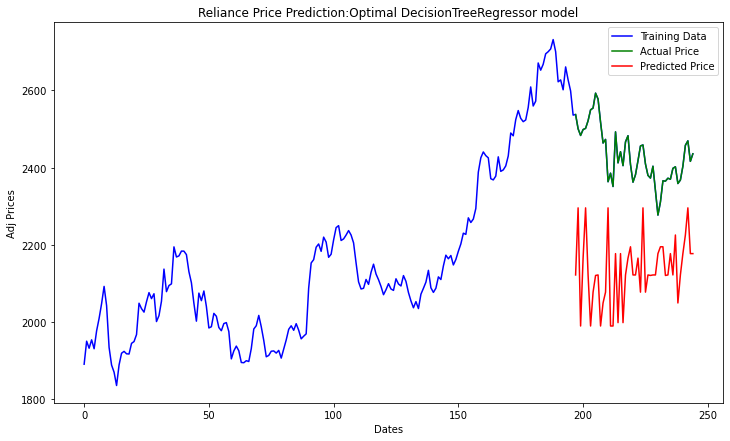

In [43]:
#Plotting the Optimal DecisionTreeRegressor model
plt.figure(figsize=(12,7))
plt.plot(X['Adj Close'], 'green', color='blue', label='Training Data')
plt.plot(x_test.index[:],y_test, color='green', label='Actual Price')
plt.plot(x_test.index[:], preds_val, color='red', label='Predicted Price')
plt.title('Reliance Price Prediction:Optimal DecisionTreeRegressor model')
plt.xlabel('Dates')
plt.ylabel('Adj Prices')
plt.legend()

In [44]:
#Importing Stock Market predictions from ARIMA Model
ArimaPrediction=pd.read_csv('ArimaPrediction.csv')
ArimaPrediction.rename(columns={'Unnamed: 0': 'Index'},inplace=True)

In [45]:
ArimaPrediction.set_index('Index',inplace=True)

In [46]:
ArimaPrediction.head(5)

,ARIMA_Prediction
Index,
197,2536.743948
198,2541.573435
199,2539.367916
200,2541.116559
201,2547.470582


In [47]:
Hybrid_Prediction=pd.DataFrame(y_test)
Hybrid_Prediction.rename(columns={'Adj Close': 'Y_Test'},inplace=True)

In [48]:
y_test.shape,preds_val.shape

((48, 1), (48,))

In [49]:
Hybrid_Prediction['DTPrediction']=preds_val
Hybrid_Prediction=Hybrid_Prediction.join(ArimaPrediction['ARIMA_Prediction'])
Hybrid_Prediction

,Y_Test,DTPrediction,ARIMA_Prediction
197,2537.800049,2122.326465,2536.743948
198,2500.800049,2296.051822,2541.573435
199,2483.600098,1990.142197,2539.367916
200,2498.850098,2165.924404,2541.116559
201,2501.949951,2296.051822,2547.470582
202,2521.699951,2122.326465,2550.938904
203,2549.899902,1990.142197,2557.434308
204,2554.550049,2077.809147,2564.857441
205,2593.100098,2121.003894,2568.383447
206,2577.800049,2122.326465,2577.955865


In [54]:
def FinalPrediction(ratio,Hybrid_Prediction):
    PredFinal=ratio*Hybrid_Prediction['ARIMA_Prediction']+(1-ratio)*Hybrid_Prediction['DTPrediction']
    return PredFinal

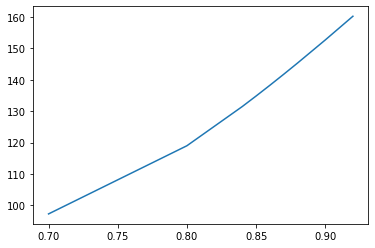

In [55]:
ratio_list=[.70,.80,.84,.85,.86,.87,.88,.90,.92]
list=[]
for ratio in ratio_list:
    PredFinal=FinalPrediction(ratio,Hybrid_Prediction)
    list.append(np.sqrt(mean_squared_error(y_test.iloc[:,:1],PredFinal)))
plt.plot(ratio_list,list)
plt.show()

In [56]:
#Implenting Final Hybrid model
PredFinal=FinalPrediction(0.5,Hybrid_Prediction)
print(np.sqrt(mean_squared_error(y_test.iloc[:,:1],PredFinal)))

115.97990735949745


In [57]:
#Final Hybrid model mean absolute error
print(mean_absolute_error(y_test.iloc[:,:1],PredFinal))

85.20680450829973


In [58]:
y_test.iloc[:,:1]

,Y_Test
197,2537.800049
198,2500.800049
199,2483.600098
200,2498.850098
201,2501.949951
202,2521.699951
203,2549.899902
204,2554.550049
205,2593.100098
206,2577.800049


In [59]:
#Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test['Y_Test'],y_test['DTPrediction'])/y_test['DTPrediction']))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

Mean Absolute Percentage Error (MAPE): 14.14 %


In [60]:
#Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test['Y_Test'],PredFinal)/y_test['Y_Test']))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

Mean Absolute Percentage Error (MAPE): 3.44 %


In [64]:
PredFinal

197    2329.535207
198    2418.812628
199    2264.755056
200    2353.520481
201    2421.761202
202    2336.632684
203    2273.788252
204    2321.333294
205    2344.693671
206    2350.141165
207    2284.258636
208    2311.369584
209    2323.350014
210    2435.824362
211    2275.034821
212    2278.579366
213    2371.124579
214    2291.785270
215    2382.444129
216    2293.445316
217    2356.348223
218    2380.230103
219    2399.053564
220    2362.256754
221    2360.088444
222    2382.859755
223    2341.895749
224    2454.669005
225    2347.939083
226    2369.879299
227    2368.554573
228    2369.726942
229    2372.197299
230    2399.322876
231    2405.547498
232    2407.411032
233    2374.104565
234    2376.279562
235    2405.531502
236    2379.137942
237    2433.387419
238    2347.062949
239    2382.807430
240    2411.948659
241    2438.910729
242    2477.905541
243    2420.732756
244    2419.795368
dtype: float64

C:\Users\VINEET~1\AppData\Local\Temp/ipykernel_448/2986549577.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(y_train, 'green', color='blue', label='Training Data')


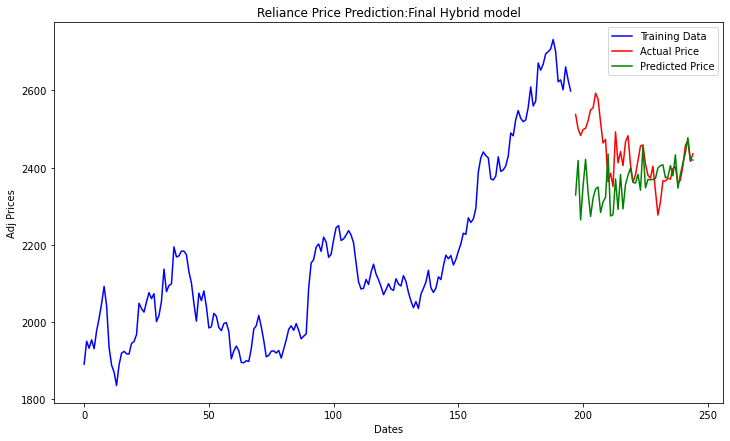

In [61]:
#Plotting the final Hybrid Model
plt.figure(figsize=(12,7))
plt.plot(y_train, 'green', color='blue', label='Training Data')
plt.plot(y_test.index[:],y_test.iloc[:,:1], color='red', label='Actual Price')
plt.plot(y_test.index[:], PredFinal, color='green', label='Predicted Price')
plt.title('Reliance Price Prediction:Final Hybrid model')
plt.xlabel('Dates')
plt.ylabel('Adj Prices')
plt.legend()

In [62]:
ModelDTRBest.predict([[.5,.5]])

array([2049.7834168])

In [ ]:

#Testing Mean Squared Error: 0.00036
#Testing Mean Absolute Error: 0.01456

# Calculate and display accuracy
#accuracy = 100 - np.mean(mape)
#print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
#!pip install evidently

In [ ]:
#!pip install pathlib

In [ ]:
import evidently

In [ ]:
import pandas as pd
from sklearn import datasets

from evidently.dashboard import Dashboard
from evidently.tabs import (
    DataDriftTab, 
    NumTargetDriftTab,
    CatTargetDriftTab,
    RegressionPerformanceTab,
    ClassificationPerformanceTab,
    ProbClassificationPerformanceTab)

In [ ]:
SPM_NumTargetDriftTab = Dashboard(tabs=[NumTargetDriftTab()])
SPM_NumTargetDriftTab.calculate(y_test,PredFinal,column_mapping = None)
#SPM_NumTargetDriftTab.save("C:/Users/Vineet Jain/Desktop/SPMmy_report.html")
SPM_NumTargetDriftTab.show()